#### Importamos librerías

In [58]:
# Instalar pycountry la primera vez. Tened en cuenta pip3. Desanotar.
!pip install pycountry


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [124]:
import os
import pandas as pd
import pycountry
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Creación de dataframe de trabajo

In [61]:
CWD = os.getcwd()
DATA_PATH = r'Users\andre\OneDrive\Documentos\BOOTCAMP\Capstone Project\capstone2030\data'
ruta_data = os.path.join(CWD, 'data')


In [62]:
archivos_excel = [archivo for archivo in os.listdir(ruta_data) if archivo.endswith('.xlsx')]
lista_dataframes = []
# Iterar sobre cada archivo y cargarlo como DataFrame
for archivo in archivos_excel:
    nombre_variable = os.path.splitext(archivo)[0]  # Utiliza el nombre del archivo (sin extensión) como nombre de la variable
    ruta_completa = os.path.join(ruta_data, archivo)

    
    # Asigna el DataFrame directamente a una variable con el mismo nombre que el archivo
    globals()[nombre_variable] = pd.read_excel(ruta_completa)

    # Creamos una lista con todos los dataframes
    lista_dataframes.append(globals()[nombre_variable])
    
    # Añade las columnas año y sexo
    año, sexo = nombre_variable.split('_')[1:]
    globals()[nombre_variable]['Año'] = año
    globals()[nombre_variable]['Sexo'] = sexo

#Creamos el dataframe con todos los datos
df = pd.concat(lista_dataframes, ignore_index=True)


In [63]:
df['Año'] = df['Año'].astype('int')

In [64]:
import pycountry 
def get_country_code(columna): #Creamos una función para conseguir el código de dos letras de cada país
    country_info = pycountry.countries.get(name=columna)
    if country_info:
        return country_info.alpha_2
    else:
        return 'EU'

In [65]:
df['Pais_code'] = df['Geographic region\Individual indicators used to compute the Gender Equality Index'].apply(get_country_code)
#Llamamos a la función pasándole la columna donde está el país

<>:1: SyntaxWarning: invalid escape sequence '\I'
<>:1: SyntaxWarning: invalid escape sequence '\I'
C:\Users\andre\AppData\Local\Temp\ipykernel_22836\2796709633.py:1: SyntaxWarning: invalid escape sequence '\I'
  df['Pais_code'] = df['Geographic region\Individual indicators used to compute the Gender Equality Index'].apply(get_country_code)


In [66]:
GEI_PATH = r'C:\Users\andre\OneDrive\Documentos\BOOTCAMP\Capstone Project\capstone2030\data_gei'
df_gei = pd.read_excel(os.path.join(GEI_PATH, 'gender-equality-index.xlsx'))

In [67]:
# Cambiamos los valores EL asignados para Grecia, por GR
df_gei['Country'] = df_gei['Country'].replace('EL', 'GR')

In [68]:
# Añadimos la columna GEI al dataframe
df1 = pd.merge(df, df_gei, left_on=['Pais_code', 'Año'], right_on=['Country', 'Index year'], how='left')

In [69]:
df1.to_excel(r'C:\Users\andre\OneDrive\Documentos\BOOTCAMP\Capstone Project\capstone2030\df1.xlsx', index=False)

In [70]:
df1.head()

,Geographic region\Individual indicators used to compute the Gender Equality Index,"FTE employment rate (%, 15+ population)","Duration of working life (years, 15+ population)","Employed people in Education, Human Health and Social Work activities (%, 15+ employed)","Ability to take an hour or two off during working hours to take care of personal or family matters (%, 15+ workers)","Career Prospects Index (points, 0-100)","Mean monthly earnings (PPS, working population)","Mean equivalised net income (PPS, 16+ population)","At-risk-of-poverty rate (%, 16+ population)",S20/S80 income quintile share (16+ population),...,"People who don’t smoke and are not involved in harmful drinking (%, 16+ population)","People doing physical activities and/or consuming fruits and vegetables (%, 16+ population)","Population with unmet needs for medical examination (%, 16+ population)","People with unmet needs for dental examination (%, 16+ population)",Año,Sexo,Pais_code,Index year,Country,Gender Equality Index
0,Austria,62,39,8,36,65,2574,23107,12,23,...,53,55,3,6,2013,men,AT,2013,AT,58.669621
1,Belgium,54,35,11,33,66,2835,19734,13,25,...,50,36,1,3,2013,men,BE,2013,BE,69.255331
2,Bulgaria,51,33,4,31,62,827,7027,18,19,...,47,18,14,15,2013,men,BG,2013,BG,55.038562
3,Cyprus,65,41,6,18,51,2503,21851,14,22,...,54,39,6,14,2013,men,CY,2013,CY,48.986893
4,Czechia,63,37,5,11,65,1438,11357,7,30,...,54,37,4,5,2013,men,CZ,2013,CZ,55.569285


In [71]:
del df1['Año']
del df1['Pais_code']

In [73]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 36 columns):
 #   Column                                                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                                                 --------------  -----  
 0   Geographic region\Individual indicators used to compute the Gender Equality Index                                                      392 non-null    object 
 1   FTE employment rate (%,  15+ population)                                                                                               392 non-null    int64  
 2   Duration of working life (years, 15+ population)                                                                                       392 non-null    int64  
 3   Employed people in Education, Human Health and Social Work activities 

In [78]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [79]:
df1.describe()

,"FTE employment rate (%, 15+ population)","Duration of working life (years, 15+ population)","Employed people in Education, Human Health and Social Work activities (%, 15+ employed)","Ability to take an hour or two off during working hours to take care of personal or family matters (%, 15+ workers)","Career Prospects Index (points, 0-100)","Mean monthly earnings (PPS, working population)","Mean equivalised net income (PPS, 16+ population)","At-risk-of-poverty rate (%, 16+ population)",S20/S80 income quintile share (16+ population),"Graduates of tertiary education (%, 15+ population)","People participating in formal or non-formal education and training (%, 15+ population)","Tertiary students in the fields of Education, Health and Welfare, Humanities and Art (tertiary students) (%, 15+ population)","People caring for and educating their children or grandchildren, elderly or people with disabilities, every day (% 18+ population)","People doing cooking and/or housework, every day (%, 18+ population)","Workers doing sporting, cultural or leisure activities outside of their home, at least daily or several times a week (%, 15+ workers)","Workers involved in voluntary or charitable activities, at least once a month (%, 15+ workers)",Share of ministers (%),Share of members of parliament (%),Share of members of regional assemblies (%),"Share of members of boards in largest quoted companies, supervisory board or board of directors (%)",Share of board members of central bank (%),Share of board members of research funding organisations (%),Share of board members of publically owned broadcasting organisations (%),Share of members of highest decision making body of the national Olympic sport organisations (%),"Self-perceived health, good or very good (%, 16+ population)",Life expectancy in absolute value at birth (years),Healthy life years in absolute value at birth (years),"People who don’t smoke and are not involved in harmful drinking (%, 16+ population)","People doing physical activities and/or consuming fruits and vegetables (%, 16+ population)","Population with unmet needs for medical examination (%, 16+ population)","People with unmet needs for dental examination (%, 16+ population)",Index year,Gender Equality Index
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.00000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,50.359694,35.359694,18.012755,26.250000,62.857143,2072.214286,17278.40051,20.869898,25.665816,25.053571,17.099490,31.535714,31.969388,54.750000,29.071429,12.252551,50.010204,50.025510,50.000000,50.076531,50.007653,50.007653,50.020408,50.000000,66.772959,79.780612,61.933673,62.451531,37.571429,5.206633,5.750000,2018.142857,63.312071
std,9.116787,3.875387,11.727396,10.936167,5.110543,731.696749,6556.50708,17.881420,15.203582,7.616424,7.105547,12.656539,8.333158,25.038461,14.414400,6.784215,25.030823,24.407231,24.101979,30.951480,33.075245,21.371933,23.612918,35.749984,10.054683,4.220015,4.877600,11.956130,13.310189,4.261366,4.140592,3.047787,8.698087
min,29.000000,22.000000,3.000000,11.000000,51.000000,633.000000,4196.00000,7.000000,12.000000,10.000000,8.000000,12.000000,12.000000,9.000000,6.000000,2.000000,0.000000,9.000000,9.000000,2.000000,0.000000,0.000000,0.000000,2.000000,38.000000,68.000000,51.000000,35.000000,6.000000,0.000000,0.000000,2013.000000,48.614853
25%,43.000000,33.000000,7.000000,18.000000,60.750000,1463.000000,11479.00000,13.000000,18.000000,19.000000,13.000000,19.000000,25.000000,32.000000,18.000000,7.000000,28.000000,27.000000,26.000000,20.000000,20.000000,37.000000,32.750000,13.000000,62.000000,78.000000,58.000000,53.000000,29.000000,2.000000,3.000000,2015.000000,55.781477
50%,50.000000,36.000000,14.000000,24.000000,64.000000,2021.00000

In [74]:
list_columns = list(df1.columns)

In [42]:
#Acortamos los nombres de las variables para que sea más fácil trabajar con ellas. 

In [84]:
nuevos_nombres = ['Country',
'FTE',
'DWL',
'EPEHHASWA',
'ATTAOTDWH',
'CPI',
'MME',
'MENI',
'ARP',
'S20/S80IQ',
'GTE',
'PFNFEAT',
'TSEFEHWA',
'PCAEPTCGEOPD',
'PDCAHE',
'WDSCLOTHAODOSTW',
'WIVORCAAOM',
'SOM',
'SOMP',
'SOMRA',
'SOMBILQCSBOD',
'SOBMCB',
'SOBMRFO',
'SOBMPBO',
'SMDMBNO',
'SPHGVO',
'LEIAVAB',
'HLYIAAB',
'PWDSANII',
'PDPAACFV',
'PWUNFME',
'PWUNFDE',
'Sexo',
'Index_year',
'ID_Country',
'GEI']

In [85]:
len(list_columns)

36

In [86]:
len(nuevos_nombres)

36

In [87]:
df1.columns = nuevos_nombres

In [88]:
mapeo_variables = {}

# Verificación de longitudes iguales entre las listas de variables antiguas y nuevas
if len(list_columns) == len(nuevos_nombres):
    for i in range(len(list_columns)):
        mapeo_variables[list_columns[i]] = nuevos_nombres[i]
else:
    print("Las listas de variables antiguas y nuevas no tienen la misma longitud")

# Imprimir el diccionario creado
print("Diccionario de mapeo de variables:")
print(mapeo_variables)

Diccionario de mapeo de variables:
{'Geographic region\\Individual indicators used to compute the Gender Equality Index': 'Country', 'FTE employment rate (%,  15+ population)': 'FTE', 'Duration of working life (years, 15+ population)': 'DWL', 'Employed people in Education, Human Health and Social Work activities (%, 15+ employed)': 'EPEHHASWA', 'Ability to take an hour or two off during working hours to take care of personal or family matters (%, 15+ workers)': 'ATTAOTDWH', 'Career Prospects Index (points, 0-100)': 'CPI', 'Mean monthly earnings (PPS, working population)': 'MME', 'Mean equivalised net income (PPS, 16+ population)': 'MENI', 'At-risk-of-poverty rate (%, 16+ population)': 'ARP', 'S20/S80 income quintile share (16+ population)': 'S20/S80IQ', 'Graduates of tertiary education (%, 15+ population)': 'GTE', 'People participating in formal or non-formal education and training (%, 15+ population)': 'PFNFEAT', 'Tertiary students in the fields of Education, Health and Welfare, Human

In [89]:
mapeo_variables

{'Geographic region\\Individual indicators used to compute the Gender Equality Index': 'Country',
 'FTE employment rate (%,  15+ population)': 'FTE',
 'Duration of working life (years, 15+ population)': 'DWL',
 'Employed people in Education, Human Health and Social Work activities (%, 15+ employed)': 'EPEHHASWA',
 'Ability to take an hour or two off during working hours to take care of personal or family matters (%, 15+ workers)': 'ATTAOTDWH',
 'Career Prospects Index (points, 0-100)': 'CPI',
 'Mean monthly earnings (PPS, working population)': 'MME',
 'Mean equivalised net income (PPS, 16+ population)': 'MENI',
 'At-risk-of-poverty rate (%, 16+ population)': 'ARP',
 'S20/S80 income quintile share (16+ population)': 'S20/S80IQ',
 'Graduates of tertiary education (%, 15+ population)': 'GTE',
 'People participating in formal or non-formal education and training (%, 15+ population)': 'PFNFEAT',
 'Tertiary students in the fields of Education, Health and Welfare, Humanities and Art (tertiary

### EDA

#### Distribución del target
Cada modelo tendrá un target distinto. No obstante, el target general del proyecto es el GEI.

In [107]:
gb_df = df1.groupby(['Index_year','ID_Country'])['GEI'].mean().reset_index()

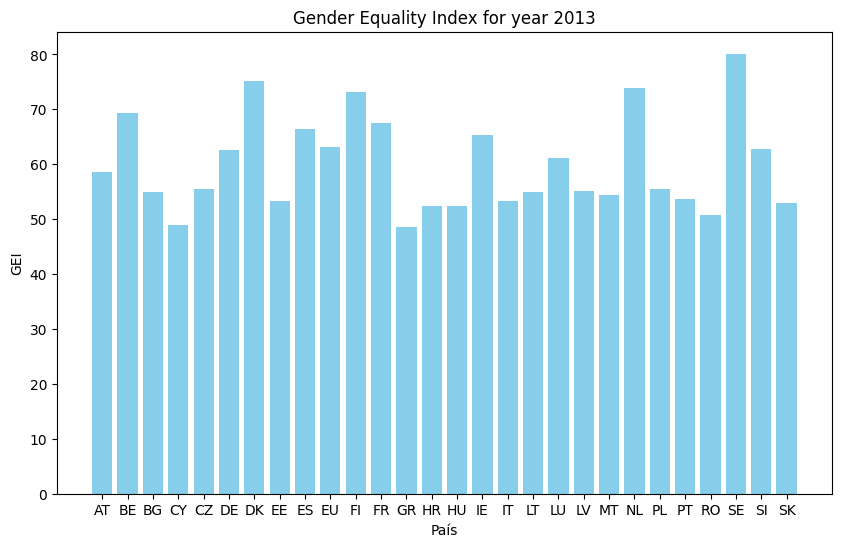

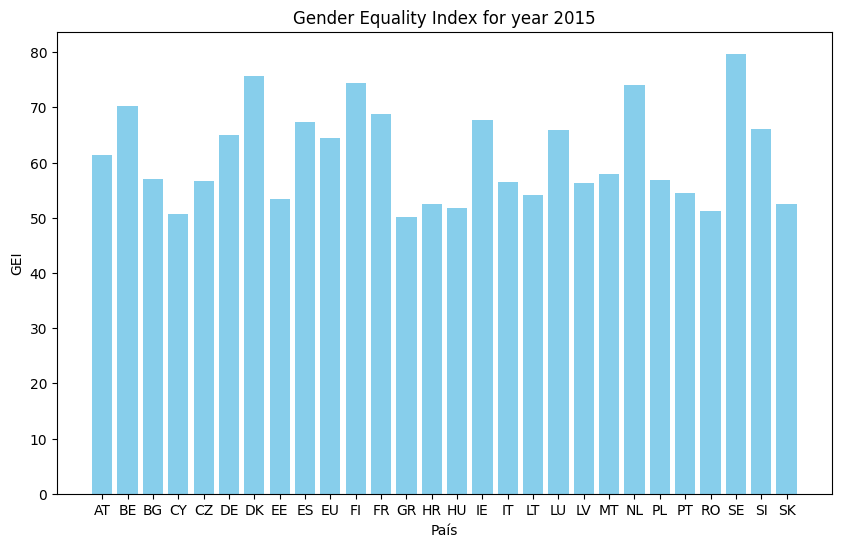

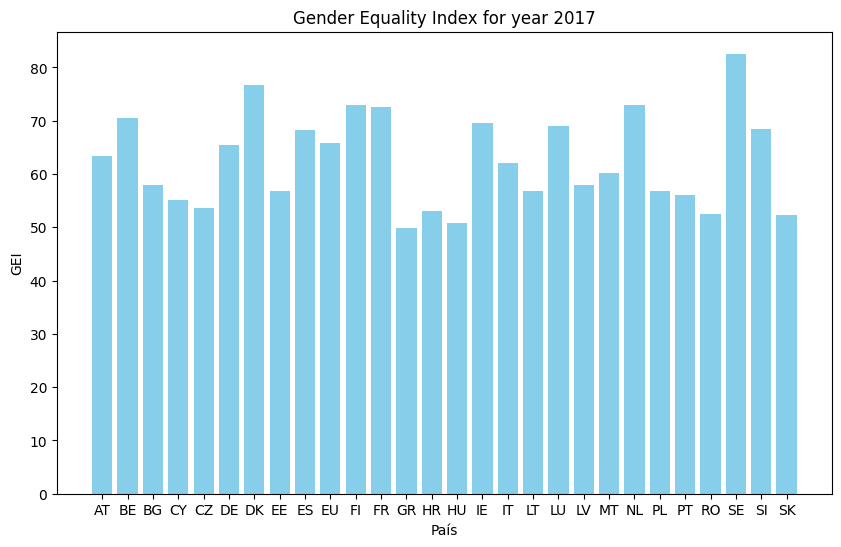

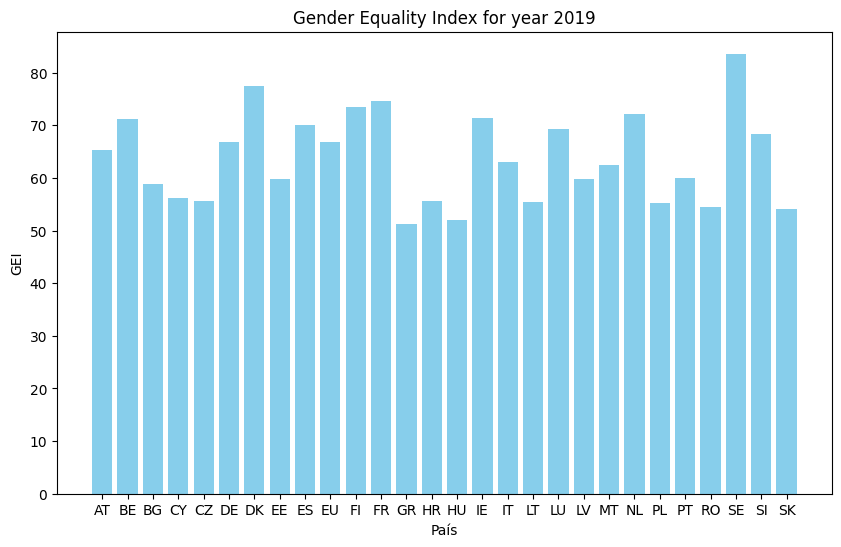

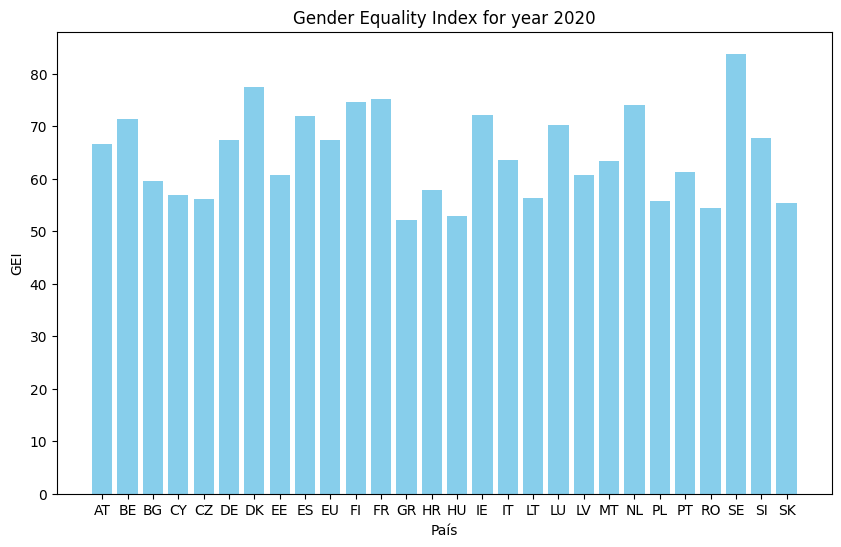

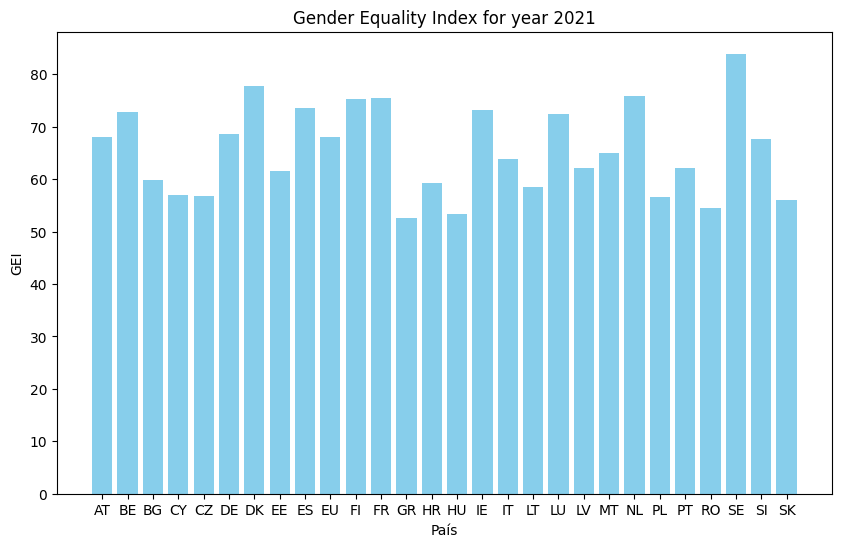

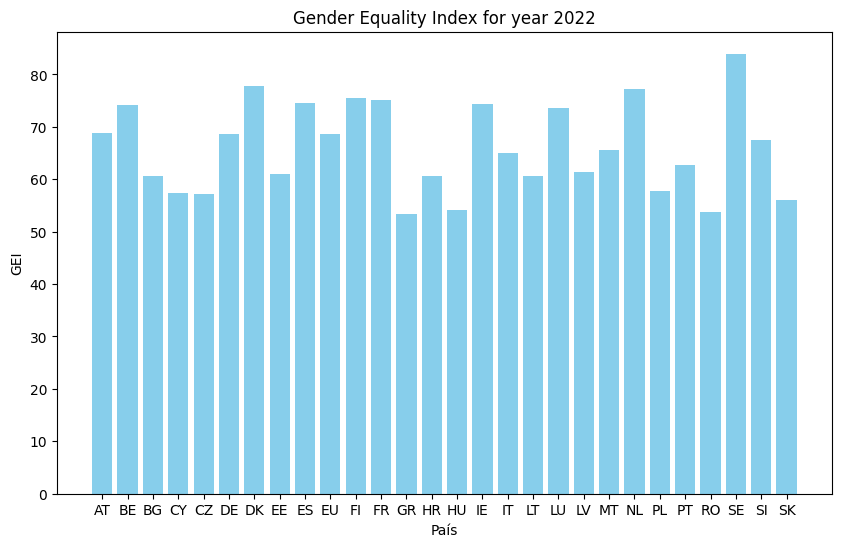

In [115]:
unique_years = gb_df['Index_year'].unique()

for year in unique_years:
    plt.figure(figsize=(10, 6))
    df_year = gb_df[gb_df['Index_year'] == year]
    plt.bar(df_year['ID_Country'], df_year['GEI'], color='skyblue')
    plt.title('Gender Equality Index for year ' + str(year))
    plt.xlabel('País')
    plt.ylabel('GEI')
    plt.show()


#### Análisis Univariable

In [117]:
def nulos (data):
  nulos = pd.DataFrame()

  variables_con_nulos = []
  for i in df:
    if df[i].isnull().any()==True:
      variables_con_nulos.append(i)

  total_nulos = []
  for i in variables_con_nulos:
    total_nulos.append(df[i].isnull().sum())

  nulos['Variables con nulos'] = variables_con_nulos
  nulos['Total de nulos'] = total_nulos

  return nulos

In [118]:
# No tenemos variables con nulos
nulos(df1)

,Variables con nulos,Total de nulos


In [123]:
# Separamos nuestro dataset entre columnas numericas, booleanas y object

# Filtrar las columnas booleanas (dos valores únicos)
boolean_columns = [col for col in df1.columns if df1[col].nunique() == 2]

# Obtener las columnas numéricas
numeric_columns = df1.select_dtypes(include=np.number).columns.tolist()
numeric_columns = [col for col in numeric_columns if df1[col].nunique() > 2]

# Filtrar las columnas object (string y más de dos valores únicos)
object_columns = df1.select_dtypes(include=object).columns.tolist()
object_columns = [col for col in object_columns if df1[col].nunique() > 2]

# Mostrar las listas resultantes
print("Columnas booleanas:", boolean_columns)
print("Columnas numéricas:", numeric_columns)
print("Columnas object:", object_columns)

Columnas booleanas: ['Sexo']
Columnas numéricas: ['FTE', 'DWL', 'EPEHHASWA', 'ATTAOTDWH', 'CPI', 'MME', 'MENI', 'ARP', 'S20/S80IQ', 'GTE', 'PFNFEAT', 'TSEFEHWA', 'PCAEPTCGEOPD', 'PDCAHE', 'WDSCLOTHAODOSTW', 'WIVORCAAOM', 'SOM', 'SOMP', 'SOMRA', 'SOMBILQCSBOD', 'SOBMCB', 'SOBMRFO', 'SOBMPBO', 'SMDMBNO', 'SPHGVO', 'LEIAVAB', 'HLYIAAB', 'PWDSANII', 'PDPAACFV', 'PWUNFME', 'PWUNFDE', 'Index_year', 'GEI']
Columnas object: ['Country', 'ID_Country']


In [129]:
# Las columnas object son las mismas. Creamos un diccionario con el mapeo de siglas y eliminamos 'Country' 
dict_country = dict(zip(df1['Country'], df1['ID_Country']))

In [131]:
del df1['Country']

In [ ]:
# La única columna booleana es 'Sexo". Contiene la misma cantidad para ambas categorías.

In [145]:
df1['Index_year'].value_counts()

Index_year
2013    56
2015    56
2017    56
2019    56
2020    56
2021    56
2022    56
Name: count, dtype: int64

In [159]:
for i in df1['Index_year'].value_counts().index:
    nombre = 'df_' + str(i)
    globals()[nombre] = df1[df1['Index_year'] == i]

In [ ]:
# Distribucion variables numéricas en el 2022
for i in numeric_columns:
  plt.hist(df_2022[i])
  plt.title('Distribucion '+i)
  plt.show()

In [ ]:
# Distribucion variables numéricas en el 2021
for i in numeric_columns:
  plt.hist(df_2021[i])
  plt.title('Distribucion '+i)
  plt.show()

### Preprocessing

#### Categóricas a numéricas

In [199]:
# Definir un diccionario de mapeo
mapeo_genero = {'men': 0, 'women': 1}

# Aplicar la transformación a la columna 'Género'
df1['Sexo'] = df1['Sexo'].map(mapeo_genero)

In [207]:
df1['Sexo'].value_counts()

Sexo
0    196
1    196
Name: count, dtype: int64

In [210]:
# Obtener las columnas numéricas
numeric_columns = df1.select_dtypes(include=np.number).columns.tolist()


# Filtrar las columnas object (string y más de dos valores únicos)
object_columns = df1.select_dtypes(include=object).columns.tolist()


# Mostrar las listas resultantes
print("Columnas numéricas:", numeric_columns)
print("Columnas object:", object_columns)

Columnas numéricas: ['FTE', 'DWL', 'EPEHHASWA', 'ATTAOTDWH', 'CPI', 'MME', 'MENI', 'ARP', 'S20/S80IQ', 'GTE', 'PFNFEAT', 'TSEFEHWA', 'PCAEPTCGEOPD', 'PDCAHE', 'WDSCLOTHAODOSTW', 'WIVORCAAOM', 'SOM', 'SOMP', 'SOMRA', 'SOMBILQCSBOD', 'SOBMCB', 'SOBMRFO', 'SOBMPBO', 'SMDMBNO', 'SPHGVO', 'LEIAVAB', 'HLYIAAB', 'PWDSANII', 'PDPAACFV', 'PWUNFME', 'PWUNFDE', 'Sexo', 'Index_year', 'GEI']
Columnas object: ['ID_Country']


#### Correlación

In [215]:
# Función correlación
def highly_correlated(df, threshold):
    col_corr = list() # Set of all the names of deleted columns
    colnames = list()
    rownames = list()
    corr_matrix = df.corr().abs()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colnames.append(corr_matrix.columns[i]) # getting the name of column
                rownames.append(corr_matrix.index[j])
                col_corr.append(corr_matrix.iloc[i, j])
    Z = pd.DataFrame({'F1':colnames,
                      'F2':rownames,
                      'corr_F1_F2':col_corr,
                      })

    return Z

highly_corr = highly_correlated(df1[numeric_columns],0.95)
highly_corr

,F1,F2,corr_F1_F2
0,SOMRA,SOMP,0.965312
1,SOMBILQCSBOD,SOMP,0.954567
2,SMDMBNO,SOMP,0.950180
3,SMDMBNO,SOMBILQCSBOD,0.958430
4,Sexo,SMDMBNO,0.965840


#### Varianza

In [192]:
from sklearn.feature_selection import VarianceThreshold

In [214]:
vt = VarianceThreshold(threshold=0.01)
vt.fit(df1[numeric_columns])

# Obtener las columnas con baja varianza
low_var_columns = [col for col, keep in zip(numeric_columns, vt.get_support()) if not keep]

print(len(low_var_columns), 'low variance features should be removed:\n', low_var_columns)

0 low variance features should be removed:
 []


### Dataframe para modelos y guardar diccionarios de variables

In [216]:
df1.to_excel(r'C:\Users\andre\OneDrive\Documentos\BOOTCAMP\Capstone Project\capstone2030\df_modelo.xlsx', index=False)

In [219]:
dic_variables = pd.DataFrame(list(mapeo_variables.items()), columns=['Variable', 'Valor'])

In [220]:
dic_variables.to_excel(r'C:\Users\andre\OneDrive\Documentos\BOOTCAMP\Capstone Project\capstone2030\dict_variables.xlsx', index=False)

In [221]:
dic_country = pd.DataFrame(list(dict_country.items()), columns=['Variable', 'Valor'])

In [222]:
dic_country.to_excel(r'C:\Users\andre\OneDrive\Documentos\BOOTCAMP\Capstone Project\capstone2030\dict_countries.xlsx', index=False)